# Цель
Проанализировать и проиллюстировать данные, найти закономерности и особенности.
Сравнить периоды до и после переезда.
## Ход работы
  * Знакомство с данными 
  * Преобработка
  * Анализ данных
  * Анализ в разрезе городов
  * Вывод

# Знакомство с данными 

Перед импортом, в данных были откорректированны в excel ошибки выгрузки:
*   Формат даты
*   Формат числовых столбцов


## Импорт данных


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from plotly import graph_objects as go
from datetime import datetime, timedelta
from scipy import stats as st
import numpy as np
import math as mth
import io
import plotly.express as px

pd.options.display.float_format = '{:.3f}'.format
pd.set_option('mode.chained_assignment', None)

In [ ]:
from google.colab import files
income = files.upload()

Saving Доходы и расходы Марк.xlsx - Доходы.csv to Доходы и расходы Марк.xlsx - Доходы (3).csv


In [ ]:
expenses = files.upload()

Saving Доходы и расходы Марк.xlsx - Расходы.csv to Доходы и расходы Марк.xlsx - Расходы (4).csv


In [ ]:
income = pd.read_csv(io.BytesIO(income['Доходы и расходы Марк.xlsx - Доходы.csv']))
income

,Дата и время,Категория,Счет,Сумма,Валюта
0,06.03.2023,Премия,Основной,60000.000,RUB
1,04.03.2023,Аренда,Капитал Аренды,16000.000,RUB
2,24.02.2023,Премия,Основной,3000.000,RUB
3,23.02.2023,Кэшбэк,Основной,147.000,RUB
4,23.02.2023,Кэшбэк,Основной,900.000,RUB
...,...,...,...,...,...
157,06.02.2021,Подарок,Основной,30.000,RUB
158,05.02.2021,Другое,Основной,1000.000,RUB
159,05.02.2021,Зарплата,Основной,1663.000,RUB
160,05.02.2021,Зарплата,Основной,13129.000,RUB


In [ ]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Дата и время  162 non-null    object 
 1   Категория     162 non-null    object 
 2   Счет          162 non-null    object 
 3   Сумма         162 non-null    float64
 4   Валюта        162 non-null    object 
dtypes: float64(1), object(4)
memory usage: 6.5+ KB


In [ ]:
expenses = pd.read_csv(io.BytesIO(expenses['Доходы и расходы Марк.xlsx - Расходы.csv']))
expenses

,Дата и время,Категория,Счет,Сумма,Валюта
0,08.03.2023,Подарки,Основной,2000.000,RUB
1,08.03.2023,Транспорт,Основной,300.000,RUB
2,08.03.2023,Подарки,Основной,14.000,RUB
3,08.03.2023,Общепит,Основной,150.000,RUB
4,08.03.2023,Общепит,Основной,450.000,RUB
...,...,...,...,...,...
2885,26.01.2021,Обед на работе,Основной,195.000,RUB
2886,26.01.2021,Транспорт,Основной,28.000,RUB
2887,26.01.2021,Транспорт,Основной,28.000,RUB
2888,25.01.2021,Продукты,Основной,637.000,RUB


In [ ]:
expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Дата и время  2890 non-null   object 
 1   Категория     2890 non-null   object 
 2   Счет          2890 non-null   object 
 3   Сумма         2890 non-null   float64
 4   Валюта        2890 non-null   object 
dtypes: float64(1), object(4)
memory usage: 113.0+ KB


**Пропусков в данных нет, но для дальнейшей работы нам понадобится работа с форматом данных и наименованиями столбцов**

## Предобработка

### Наименования столбцов

Приведем столбцы к змеинрому регистру

In [ ]:
income = income.rename(
    columns={'Дата и время':'date', 'Категория':'category', 'Счет':'account', 'Сумма':'amount', 'Валюта':'cur'})

In [ ]:
expenses = expenses.rename(
    columns={'Дата и время':'date', 'Категория':'category', 'Счет':'account', 'Сумма':'amount', 'Валюта':'cur'})

### Формат данных

In [ ]:
income['date'] = income['date'].astype('datetime64') 
income['amount'] = income['amount'].astype('float')

In [ ]:
expenses['date'] = expenses['date'].astype('datetime64') 
expenses['amount'] = expenses['amount'].astype('float')

Даты и числа приведены к рабочему формату

### Обработка дубликатов

In [ ]:
income[income.duplicated()]

,date,category,account,amount,cur


In [ ]:
expenses[expenses.duplicated()]

,date,category,account,amount,cur
20,2023-04-03,Общепит,Основной,390.000,RUB
21,2023-04-03,Общепит,Основной,390.000,RUB
59,2023-02-22,Подарки,Основной,70.000,RUB
185,2023-01-18,Уходовые штуки,Основной,1272.000,RUB
308,2022-07-12,Продукты,Основной,177.000,RUB
...,...,...,...,...,...
2834,2021-08-02,Транспорт,Основной,28.000,RUB
2840,2021-06-02,Транспорт,Основной,56.000,RUB
2842,2021-06-02,Транспорт,Основной,56.000,RUB
2852,2021-04-02,Транспорт,Основной,28.000,RUB


**В графе расходов обнаружено 74 дубликата.** Однако, учитывая специфику данных, удалять их будет неверно - есть вероятность потратить одну сумму по одной категории несколько раз за день.

### Общий обзор данных

In [ ]:
income['category'].value_counts()

Кэшбэк        45
Премия        42
Зарплата      24
Аренда        15
Подарок       14
Подработка     9
Другое         9
Пособие        3
Мистика        1
Name: category, dtype: int64

Больше всего поступлений было по категории Кешбэк

In [ ]:
expenses['category'].value_counts()

Продукты               1180
Обед на работе          376
Общепит                 361
Транспорт               203
Подарки                 125
Бытовое                  86
Покурёхать               76
Такси                    69
Здоровье                 40
Подписки                 36
Связь                    34
Работа                   33
Рассрочка                30
Игры                     25
Инет                     24
Коммуналка               23
Одежда                   22
Дорога+проживание        22
Аренда                   19
Досуг                    18
Налоги                   17
Инвестиции               15
Уходовые штуки           15
Переезд                  10
подарки                   8
Красота                   7
Благотворительность       7
Подарок себе              5
Мистика                   2
Другое                    1
Образование               1
Name: category, dtype: int64

Больше всего трат - по категории Продукты

# Анализ данных

## Распределение по категориям

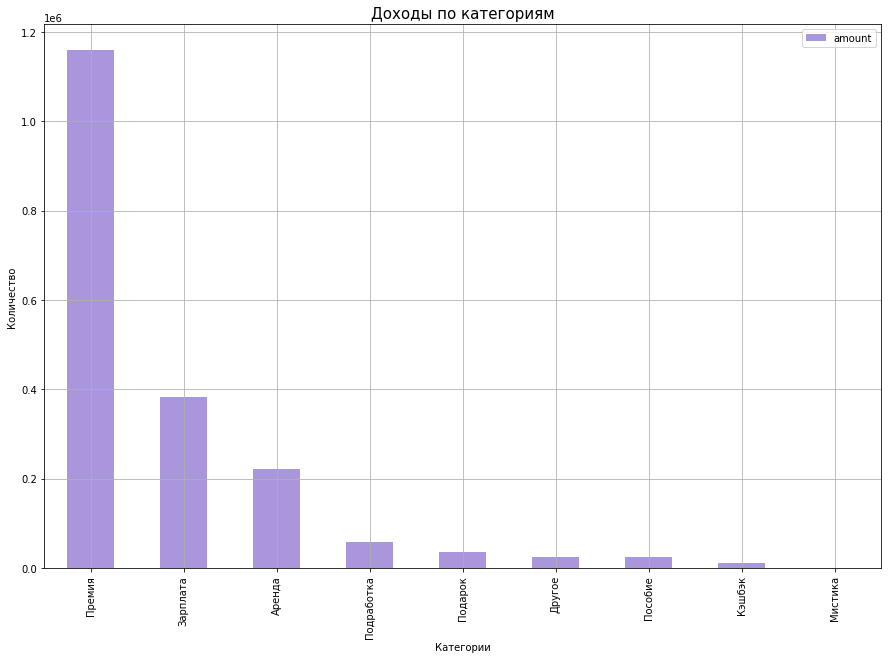

In [ ]:
income_by_category = (
     income.groupby(['category'])
    .agg({'amount': 'sum'})
    .sort_values(by='amount', ascending = False)
    .reset_index())

income_by_category.plot(
    x='category', y='amount',
    kind='bar', figsize=(15, 10), grid=True,
    color = '#AA96DA', fontsize=10
) 

plt.title('Доходы по категориям', fontsize=15)
plt.ylabel('Количество', fontsize=10)
plt.xlabel('Категории', fontsize=10)
plt.show()

**Зарплаты в три раза меньше, чем премии :)**

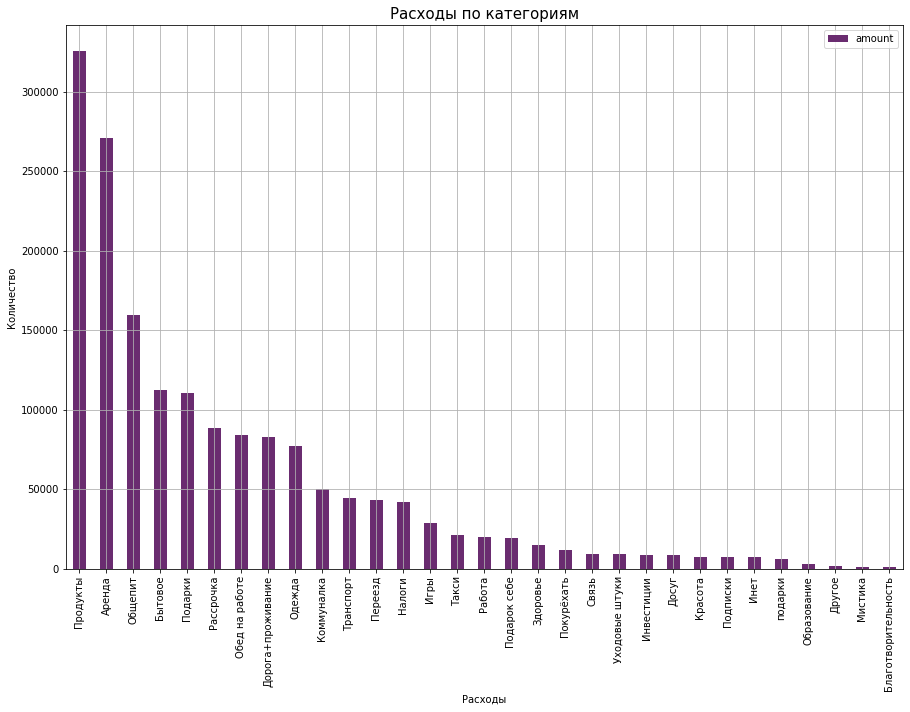

In [ ]:
expenses_by_category = (
     expenses.groupby(['category'])
    .agg({'amount': 'sum'})
    .sort_values(by='amount', ascending = False)
    .reset_index())

expenses_by_category.plot(
    x='category', y='amount',
    kind='bar', figsize=(15, 10), grid=True,
    color = '#6A2C70', fontsize=10
) 

plt.title('Расходы по категориям', fontsize=15)
plt.ylabel('Количество', fontsize=10)
plt.xlabel('Расходы', fontsize=10)
plt.show()

**Самые крупные строки расходов - Продукты, аренда и общепит**

## Распределение по времени

### Доходы

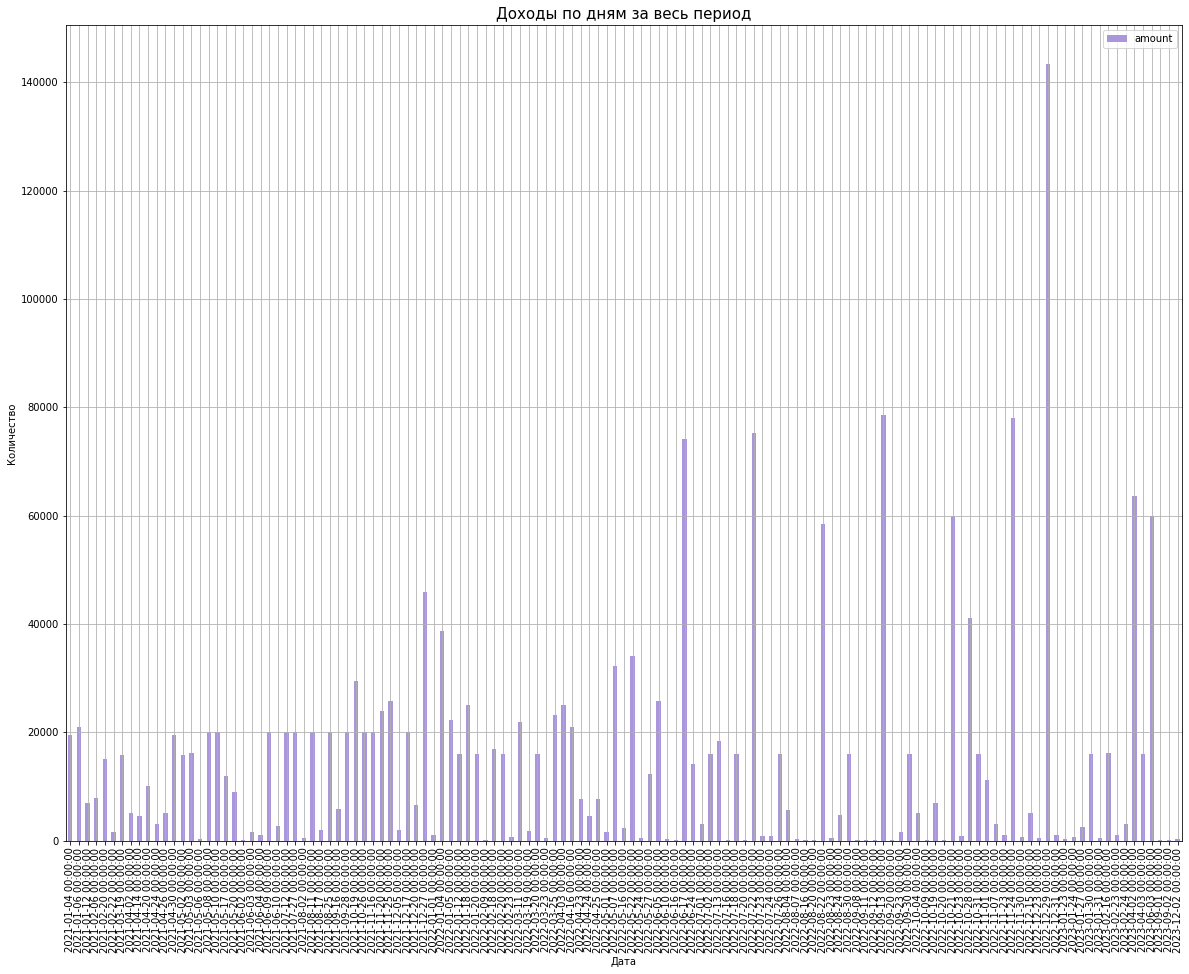

In [ ]:
income_by_date = (
     income.groupby(['date'])
    .agg({'amount': 'sum'})
    .reset_index())

income_by_date.plot(
    x='date', y='amount',
    kind='bar', figsize=(20, 15), grid=True,
    color = '#AA96DA', fontsize=10
) 

plt.title('Доходы по дням за весь период', fontsize=15)
plt.ylabel('Количество', fontsize=10)
plt.xlabel('Дата', fontsize=10)
plt.show()

**По этому графику можно сделать много выводов о финансах во времени, но он слишком масштабный.** 

Для более детального анализа, посмотрим распределения по месяцам и дням в месяце:

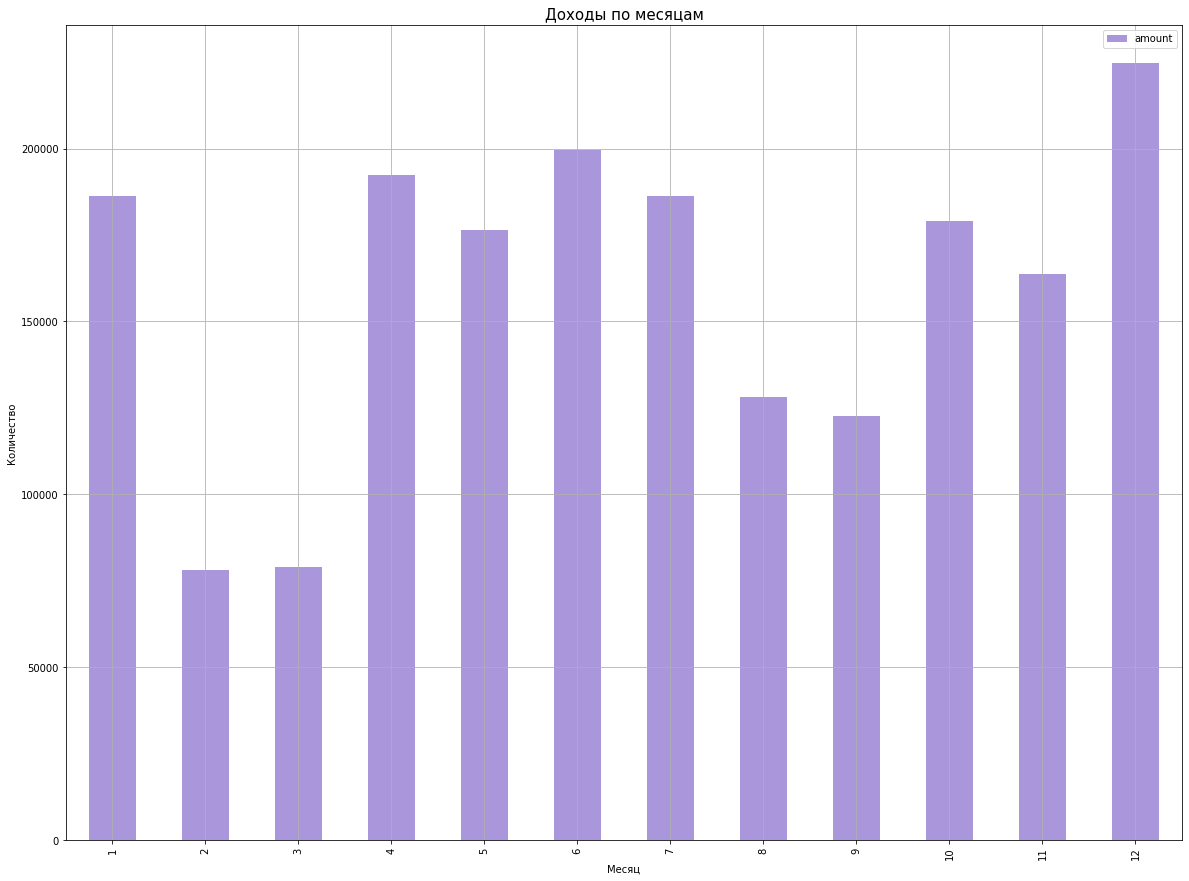

In [ ]:
income['month'] = income['date'].dt.month #выделяем месяц в отдельную колонку

income_by_month = (
     income.groupby(['month'])
    .agg({'amount': 'sum'})
    .reset_index())

income_by_month.plot(
    x='month', y='amount',
    kind='bar', figsize=(20, 15), grid=True,
    color = '#AA96DA', fontsize=10
) 

plt.title('Доходы по месяцам', fontsize=15)
plt.ylabel('Количество', fontsize=10)
plt.xlabel('Месяц', fontsize=10)
plt.show()

**Декабрь и июнь - самые доходные**

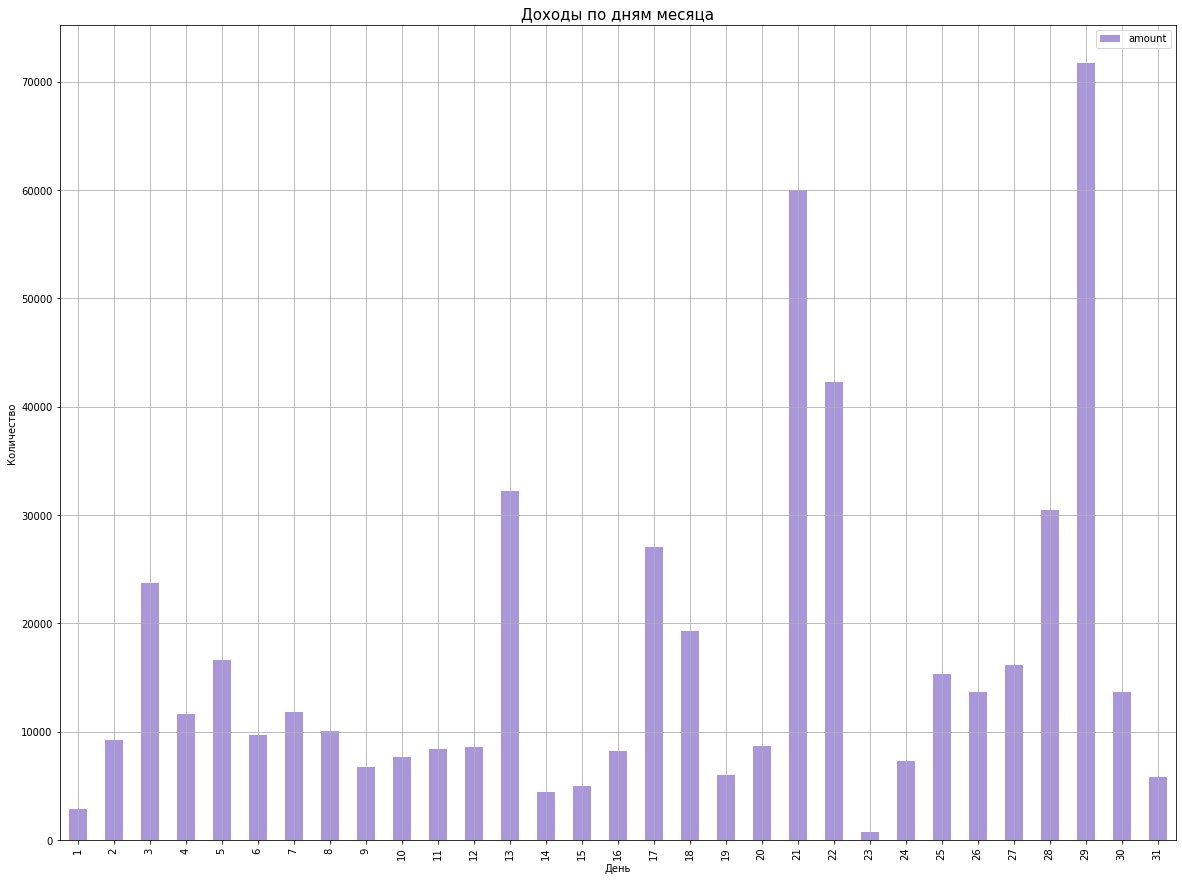

In [ ]:
income['day'] = income['date'].dt.day #выделяем день в отдельную колонку

income_by_day = (
     income.groupby(['day'])
    .agg({'amount': 'mean'})
    .reset_index())

income_by_day.plot(
    x='day', y='amount',
    kind='bar', figsize=(20, 15), grid=True,
    color = '#AA96DA', fontsize=10
) 

plt.title('Доходы по дням месяца', fontsize=15)
plt.ylabel('Количество', fontsize=10)
plt.xlabel('День', fontsize=10)
plt.show()

**14 и 15 премию можно не ждать, в отличии от 22 и 29**

### Расходы

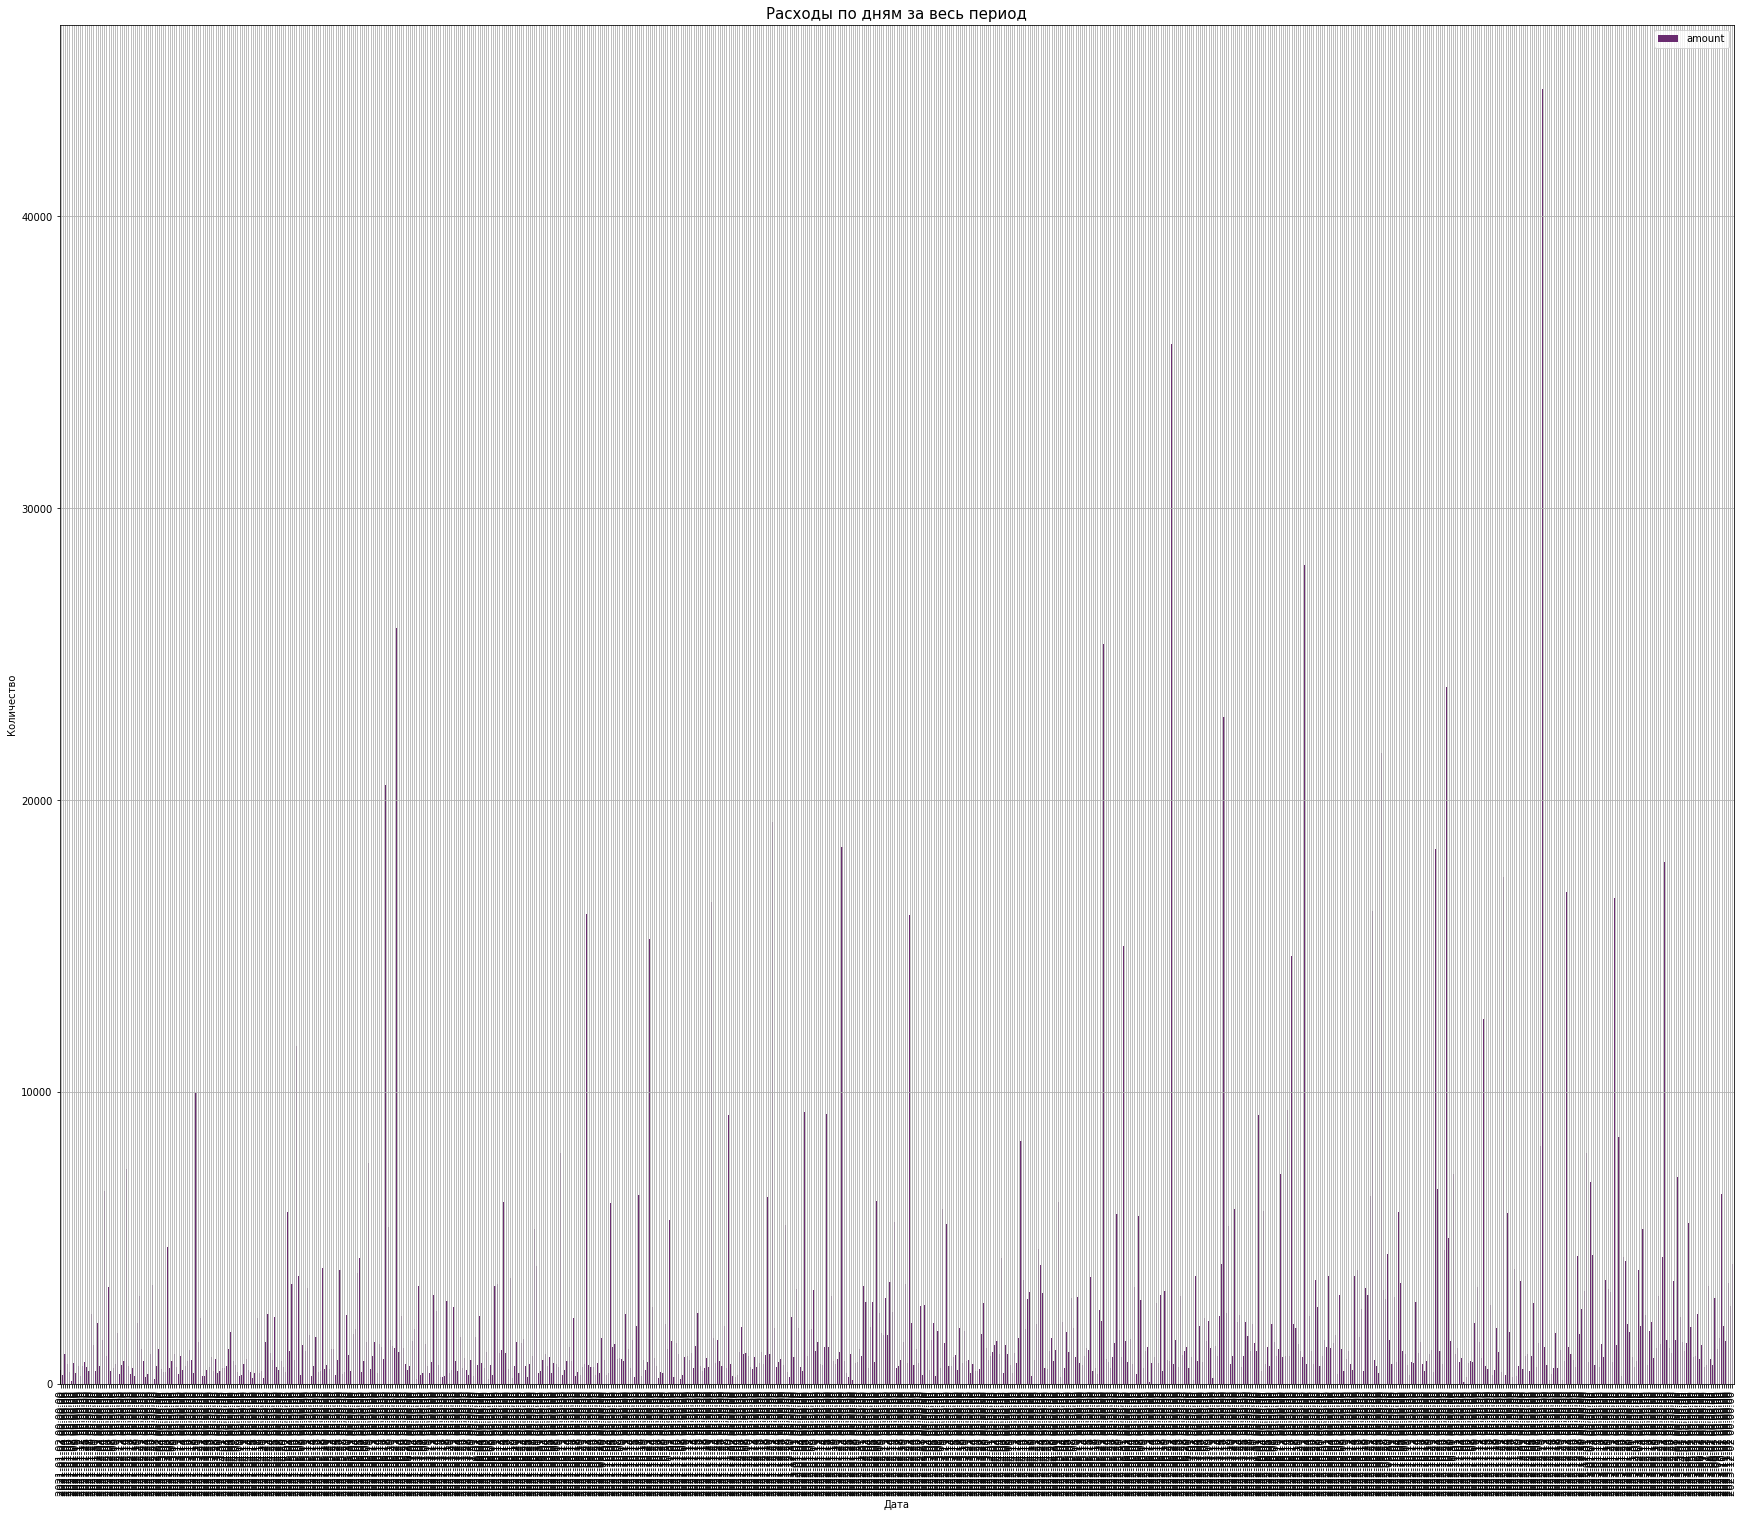

In [ ]:
expenses_by_date = (
     expenses.groupby(['date'])
    .agg({'amount': 'sum'})
    .reset_index())

expenses_by_date.plot(
    x='date', y='amount',
    kind='bar', figsize=(30, 25), grid=True,
    color = '#6A2C70', fontsize=10
) 

plt.title('Расходы по дням за весь период', fontsize=15)
plt.ylabel('Количество', fontsize=10)
plt.xlabel('Дата', fontsize=10)
plt.show()

На таком графике мало что можно понять - нужно укрупнение 

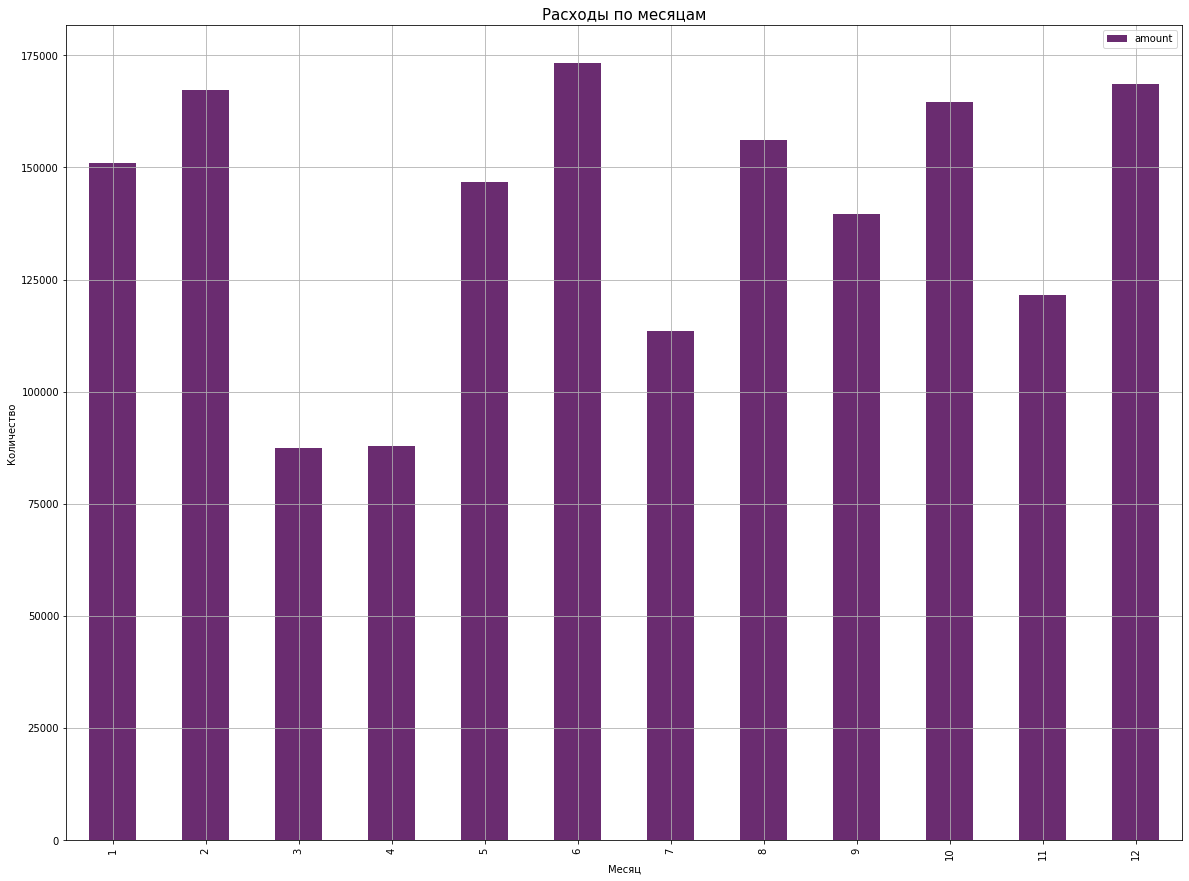

In [ ]:
expenses['month'] = expenses['date'].dt.month #выделяем месяц в отдельную колонку

expenses_by_month = (
     expenses.groupby(['month'])
    .agg({'amount': 'sum'})
    .reset_index())

expenses_by_month.plot(
    x='month', y='amount',
    kind='bar', figsize=(20, 15), grid=True,
    color = '#6A2C70', fontsize=10
) 

plt.title('Расходы по месяцам', fontsize=15)
plt.ylabel('Количество', fontsize=10)
plt.xlabel('Месяц', fontsize=10)
plt.show()

Июнь, февраль и декабрь - самые затратные 

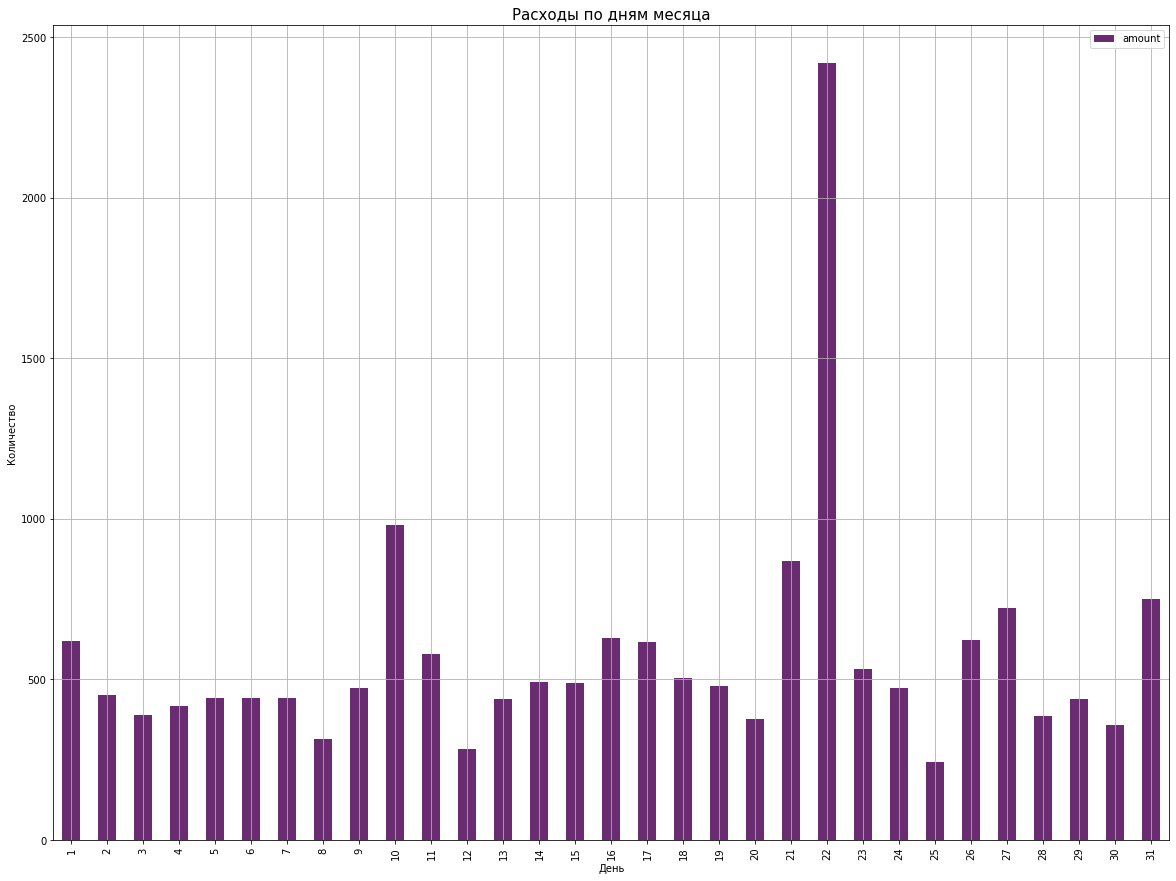

In [ ]:
expenses['day'] = expenses['date'].dt.day #выделяем день в отдельную колонку

expenses_by_day = (
     expenses.groupby(['day'])
    .agg({'amount': 'mean'})
    .reset_index())

expenses_by_day.plot(
    x='day', y='amount',
    kind='bar', figsize=(20, 15), grid=True,
    color = '#6A2C70', fontsize=10
) 

plt.title('Расходы по дням месяца', fontsize=15)
plt.ylabel('Количество', fontsize=10)
plt.xlabel('День', fontsize=10)
plt.show()

22 очень ярко лидирует по расходам. Посмотрим, что там такое в разрезе категорий

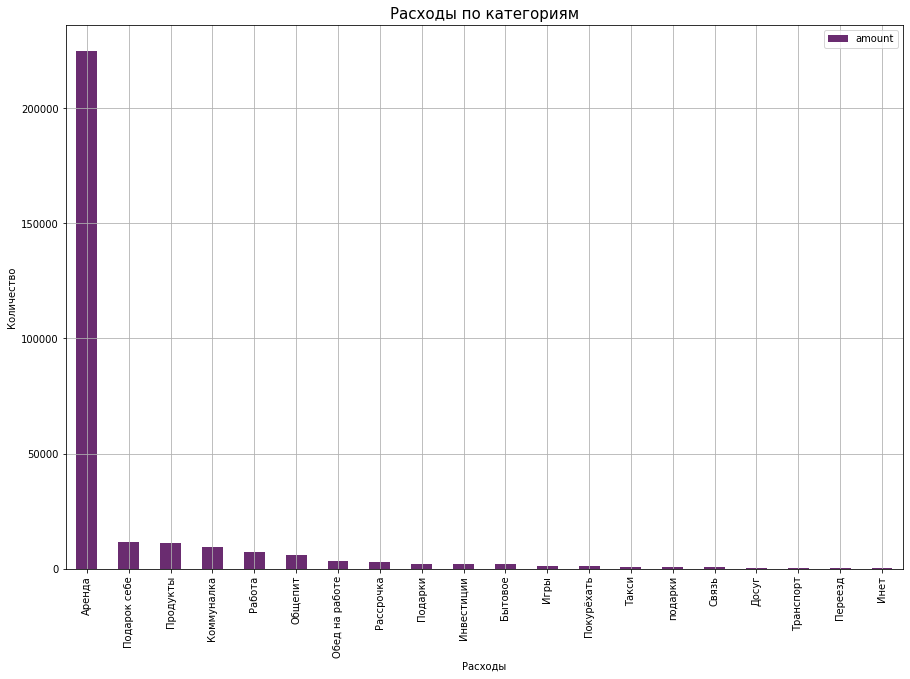

In [ ]:
expenses_22 = expenses[expenses['day']==22] #делаем срез по дню

expenses_22_by_category = (
     expenses_22.groupby(['category'])
    .agg({'amount': 'sum'})
    .sort_values(by='amount', ascending = False)
    .reset_index())

expenses_22_by_category.plot(
    x='category', y='amount',
    kind='bar', figsize=(15, 10), grid=True,
    color = '#6A2C70', fontsize=10
) 

plt.title('Расходы по категориям', fontsize=15)
plt.ylabel('Количество', fontsize=10)
plt.xlabel('Расходы', fontsize=10)
plt.show()

Выброс вызван оплатой аренды 

## До и после переезда

Добавим в датасеты столбец с городом. Известно, что дата переезда 17.06.2021

In [ ]:
income['city'] = np.where(income['date'] >= '2021-06-17', 'msk', 'krs')
expenses['city'] = np.where(expenses['date'] >= '2021-06-17', 'msk', 'krs')

### Общее распределение 

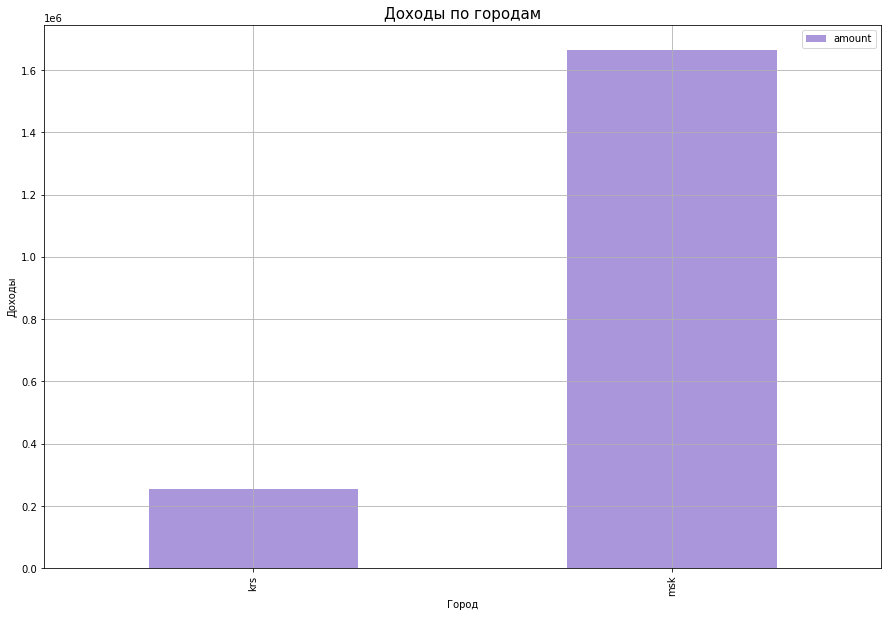

In [ ]:
income_sum = income.pivot_table(
    index='city', values = 'amount', aggfunc='sum').reset_index()

income_sum.plot(
    x='city', y='amount',
    kind='bar', figsize=(15, 10), grid=True,
    color = '#AA96DA', fontsize=10
) 

plt.title('Доходы по городам', fontsize=15)
plt.ylabel('Доходы', fontsize=10)
plt.xlabel('Город', fontsize=10)
plt.show()

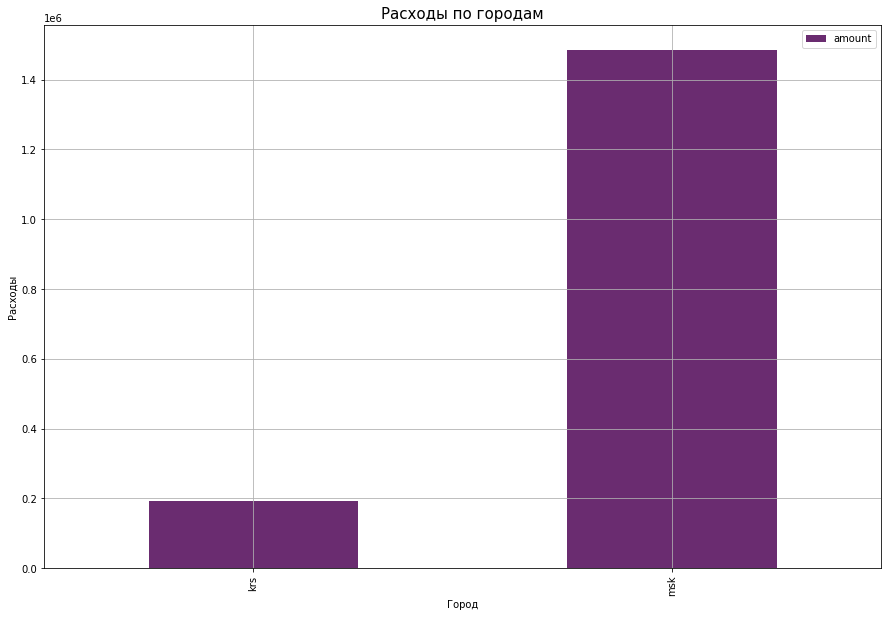

In [ ]:
expenses_sum = expenses.pivot_table(
    index='city', values = 'amount', aggfunc='sum').reset_index()

expenses_sum.plot(
    x='city', y='amount',
    kind='bar', figsize=(15, 10), grid=True,
    color = '#6A2C70', fontsize=10
) 

plt.title('Расходы по городам', fontsize=15)
plt.ylabel('Расходы', fontsize=10)
plt.xlabel('Город', fontsize=10)
plt.show()

**Расходы растут пропорционально доходам** 

### По категориям 

In [ ]:
income_pivot = income.pivot_table(
    index='category', values = 'amount', columns=['city'], aggfunc='sum').reset_index()

income_pivot

city,category,krs,msk
0,Аренда,NaN,220500.000
1,Другое,10920.000,14555.000
2,Зарплата,199863.000,182005.000
3,Кэшбэк,NaN,11432.160
4,Мистика,347.000,NaN
5,Подарок,8030.000,27400.000
6,Подработка,9650.000,47920.000
7,Пособие,24259.000,NaN
8,Премия,NaN,1159154.500


Самой большой категории доходов, премии, не было в до переезда 

In [ ]:
fig = px.histogram(income_pivot, x='category', y=income_pivot.columns,
                  title = 'Доходы и их категории по городам', color_discrete_sequence=[
                      '#c24667','#f18c82'])
fig.update_layout(xaxis_title='Категории')
fig.update_layout(yaxis_title='Доходы')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

### Зарплата по дням в разрезе городов

In [ ]:
income_zp = income[income['category'] == 'Зарплата']

In [ ]:
income_zp_pivot_day = income_zp.pivot_table(
    index='date', values = 'amount', columns=['city'], aggfunc='sum').reset_index()

income_zp_pivot_day

city,date,krs,msk
0,2021-01-04,19442.000,NaN
1,2021-01-06,21000.000,NaN
2,2021-02-20,15000.000,NaN
3,2021-03-19,15000.000,NaN
4,2021-04-20,10000.000,NaN
5,2021-04-30,19500.000,NaN
6,2021-05-02,14792.000,NaN
7,2021-05-03,16129.000,NaN
8,2021-05-08,20000.000,NaN
9,2021-05-10,20000.000,NaN


In [ ]:
fig = px.histogram(income_zp_pivot_day, x='date', y=income_zp_pivot_day.columns,
                  title = 'Зарплата по дням в разрезе городов', color_discrete_sequence=[
                      '#c24667','#f18c82'])
fig.update_layout(xaxis_title='Дни')
fig.update_layout(yaxis_title='Зарплата')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

Зарплата в Краснодаре была больше, но в остальном..

In [ ]:
expenses_pivot = expenses.pivot_table(
    index='category', values = 'amount', columns=['city'], aggfunc='sum').reset_index()

In [ ]:
fig = px.histogram(expenses_pivot, x='category', y=expenses_pivot.columns,
                  title = 'Расходы и их категории по городам', color_discrete_sequence=[
                      '#c24667','#f18c82'])
fig.update_layout(xaxis_title='Категории')
fig.update_layout(yaxis_title='Расходы')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

В Москве ты стал курить больше

### По дням месяца

Самым понятным и наглядным было распределение по дням месяца. Повторим его с разбивкой по городам 

In [ ]:
income_pivot_day = income.pivot_table(
    index='day', values = 'amount', columns=['city'], aggfunc='mean').reset_index()

In [ ]:
fig = px.histogram(income_pivot_day, x='day', y=income_pivot_day.columns,
                  title = 'Доходы по дням в разрезе городов', color_discrete_sequence=[
                      '#c24667','#f18c82'])
fig.update_layout(xaxis_title='Дни')
fig.update_layout(yaxis_title='Доходы')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

**В Краснодаре зарплата приходила 5 - 10**



In [ ]:
expenses_pivot_day = expenses.pivot_table(
    index='day', values = 'amount', columns=['city'], aggfunc='mean').reset_index()


In [ ]:
fig = px.histogram(expenses_pivot_day, x='day', y=expenses_pivot_day.columns,
                  title = 'Расходы по дням в разрезе городов', color_discrete_sequence=[
                      '#c24667','#f18c82'])
fig.update_layout(xaxis_title='Дни')
fig.update_layout(yaxis_title='Расходы')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

Конец и начало месяца - экономное время

# Вывод 

  * Премия - основной источник дохода
  * Продукты и аренда - основной источник расходов
  * Самые доходные месяцы - декабрь и июнь
  * Самые расходные - июнь, декабрь и февраль

Перед следущими выводами нужно отметить, что они исключительно обзорны, так как данных до перееезда недостаточно для составления полного вывода
  * Доходы в Москве существенно возрасли, как и расходы
  * Категории расходов и доходов так же изменились - появилась премия, снизалась зарплата
  * Поменяось время поступления ДС, так же можно отметить изменение частоты поступлений